In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
import math
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn import tree
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, RobustScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_boston
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:


df = load_boston()
data = pd.DataFrame(df['data'],columns = df['feature_names'])
y = pd.DataFrame(df['target'])



/home/victoria/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

In [3]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

In [5]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [6]:
scaler = StandardScaler()

In [7]:
X_train_scaled = scaler.fit_transform(X_train)

In [8]:
X_train = pd.DataFrame(X_train_scaled, columns = X_train.columns)


In [9]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [10]:
X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns)


In [11]:
model = TSNE(n_components=2, learning_rate=250,
                   random_state=42).fit_transform(X_train)

/home/victoria/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [12]:
print("Org data dimension is {}.Embedded data dimension is {}".format(X_train.shape[-1], model.shape[-1]))
 


Org data dimension is 13.Embedded data dimension is 2


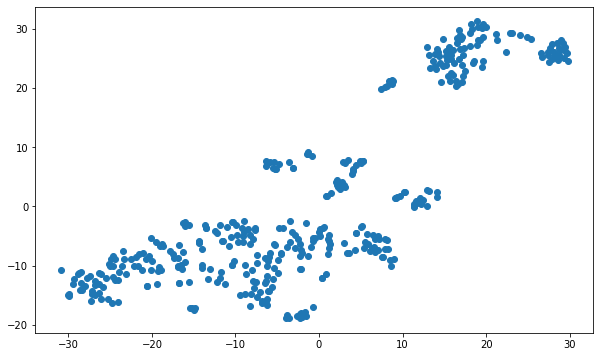

In [13]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(model[:,0],model[:,1])
plt.show()

## 2

In [14]:
model2 = KMeans(n_clusters =3, random_state = 42,max_iter = 100)

In [15]:
train_labels = model2.fit_predict(X_train)

In [16]:
train_labels

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

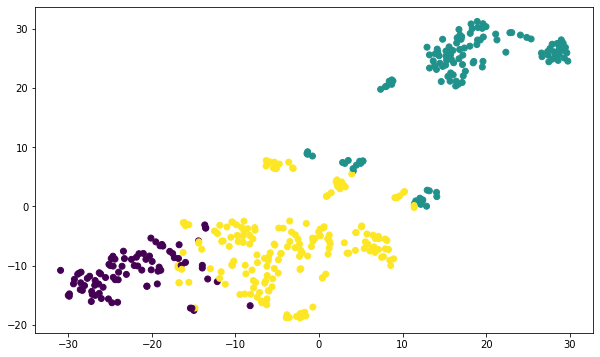

In [17]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(model[:,0],model[:,1],c=train_labels)
plt.show()

In [18]:
X_train = pd.DataFrame(X_train)

In [19]:
print(X_train['CRIM'][train_labels == 0].mean())
print(X_train['CRIM'][train_labels == 1].mean())
print(X_train['CRIM'][train_labels == 2].mean())

-0.39886418651917493
0.810903555051046
-0.3595938819415387


In [20]:
print( y_train[train_labels == 0].mean())
print( y_train[train_labels == 1].mean())
print( y_train[train_labels == 2].mean())

0    27.788372
dtype: float64
0    16.165354
dtype: float64
0    24.958115
dtype: float64


In [21]:
X_train.columns[:], X_train.index

(Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT'],
       dtype='object'),
 RangeIndex(start=0, stop=404, step=1))

In [22]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


## 3

In [23]:
test_labels = model2.fit_predict(X_test)

In [24]:
print(X_test['CRIM'][test_labels == 0].mean())
print(X_test['CRIM'][test_labels == 1].mean())
print(X_test['CRIM'][test_labels == 2].mean())

-0.4779584800485559
0.7797755164435581
-0.4591766545926271


In [26]:
print( y_test[test_labels == 0].mean())
print( y_test[test_labels == 1].mean())
print( y_test[test_labels == 2].mean())

0    34.553846
dtype: float64
0    16.710526
dtype: float64
0    21.717647
dtype: float64


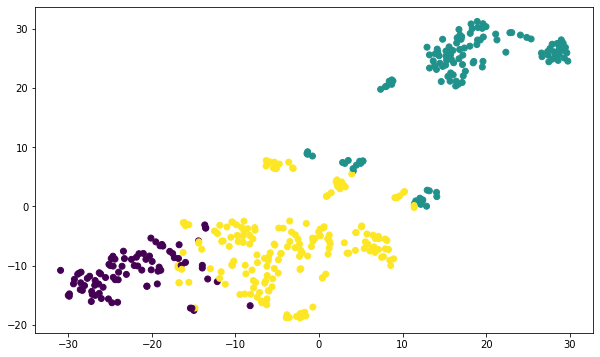

In [27]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(model[:,0],model[:,1],c=test_labels)
plt.show()